# <center>"Plug and Play" Method for Stock Market Analysis Project</center>
<br>

This portofolio project is designed to look at data from the stock market, the default examples below are clean energy stocks. Notes are included on how to change the stocks to your liking in order to compare your favorite companies on the fly! Look out for __!Plug and Play!__ sections and make sure to read the notes included. 

#### Basic Instructions
 1.) Once you have gone through each plug'n'play section, click on the "Cell" dropdown menu in Jupyter and click on "Run All".
 <br>
 2.) Choose at LEAST 2 stocks and NO MORE than 4.
 <br>
 3.) You will need basic knowledge of utilizing Jupyter Notebook with Python when downloading this file.
<br>
<br>
If you are anything like me, when it comes to the Stock Market and making decisions on where to even begin investment, I'm a "show me the numbers" and data kind of person. Most of the finance sites DO offer great information to look at, but may not offer value risks. Ideally one could hire a broker to help you out or go by 'feeling', but I like to tinker on my own and this project can be used to help visualize your chosen stocks over time before really jumping in.
<br>
<br>
This project is adapted from Jose Portilla's online Python course and converted for the latest version of Python 3. Pandas is primarily used to pull stock information from the web, followed by visualizations. More importantly, there are several ways demonstrated on analyzing the risk of your chosen stock based on performance over time.
<br>
<br>
One final method is used to predict how the stock(s) may behave in the future, which can be handy if you are trying to make informed decisions. Ideally before making any kind of investment, I would recommend also reading some literature on the stock market beforehand such as __[One Up On Wall Street: How To Use What You Already Know To Make Money in The Market](https://www.amazon.com/gp/product/0743200403)__ by Peter Lynch.

### This project is designed to answer the following questions:

 * What was the change in price of the stock over time?
 * What was the daily return of the stock on average?
 * What was the moving average of the various stocks?
 * What was the correlation between different stocks' closing prices?
 * What was the correlation between different stocks' daily returns?
 * How much value do we put at risk by investing in a particular stock?
 * How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Information Over Time

This section handles requesting stock information and reading data from Yahoo and show basic exploratory data analysis.

In [61]:
# Import Code
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Import Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Reads stock data from Yahoo Finance website
# Fixes reading data from yahoo
import fix_yahoo_finance as yf
import pandas_datareader.data as web
from pandas_datareader import data as data
#from pandas_datareader as data

# For displaying time stamp info
from datetime import datetime

# For division
from __future__ import division

__!Plug and Play Section!__

The "stock_list" below can include any stocks you want, but you need the correct abbreviation "symbol" code. Head over to [Yahoo Finance](https://finance.yahoo.com/) to search for the symbol codes you need and replace the list below (ideally you should include at least two).
<br>
<br>
The examples in this project are examining the viability of clean energy companies and their recent positive trends. Once a niche market, now more than ever may be the best time to invest in clean energy as the world turns to accelerate efforts to transform energy systems. You can also compare against gas companies, for example, or simply use any stock combinations representing other businesses (tech, clothing, food, medical, gaming, apps, etc.).

In [167]:
# Replace stocks here as needed, make sure to place the symbol code 
# between the double quotations and separate with commas 
# if using multiple stocks.

# stock_list dataframe object that will hold the desired stock data
stock_list = ["TSLA","ORA","SEDG","FSLR"]

# This sets up 'End' and 'Start' times for data to grab
# 'End' time is the current day
# 'Start' is how far to go back (goes back 1 year, but can be changed to go back further)
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

# Data Gathering from Yahoo! Finance
for stock in stock_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
# Data Gathering Alternative, used later for Monte Carlo Method
symbols = {symbol:web.DataReader(symbol, 'yahoo', start, end) for symbol in stock_list}

__!Plug and Play Section!__

In [168]:
# Summarizes Stats for one chosen Company
# Change 'SymbolCode' (i.e. SEDG) to any stock in your list
SEDG.describe()
#symbols["SEDG"].describe()

High         Low        Open       Close        Volume  \
count  254.000000  254.000000  254.000000  254.000000  2.540000e+02   
mean   290.573575  276.438209  283.941717  283.165355  8.739523e+05   
std     35.064159   33.529473   34.564164   34.278026  8.135400e+05   
min    213.429993  199.330002  202.000000  204.009995  1.993000e+05   
25%    267.250000  256.302505  261.399986  260.602501  5.062250e+05   
50%    285.044998  272.564987  280.089996  279.710007  7.014000e+05   
75%    310.497498  293.750000  305.830002  302.862503  9.624500e+05   
max    389.709991  360.000000  368.000000  368.329987  1.027530e+07   

        Adj Close  
count  254.000000  
mean   283.165355  
std     34.278026  
min    204.009995  
25%    260.602501  
50%    279.710007  
75%    302.862503  
max    368.329987

In [64]:
# Summarizes Stats for one chosen Company
# Change 'SymbolCode' (i.e. TSLA) to any stock in your list
TSLA.describe()
#symbols["TSLA"].describe()

High          Low         Open        Close        Volume  \
count   254.000000   254.000000   254.000000   254.000000  2.540000e+02   
mean    805.887536   771.896694   789.798032   789.675273  2.680972e+07   
std     174.765367   163.360572   169.396735   169.748666  1.132378e+07   
min     566.210022   539.489990   552.549988   563.000000  9.800600e+06   
25%     684.324997   652.210007   670.187500   668.179993  1.882018e+07   
50%     741.479980   713.535004   727.400024   731.569977  2.465930e+07   
75%     877.905014   852.662491   858.054993   864.242508  3.147248e+07   
max    1243.489990  1217.000000  1234.410034  1229.910034  8.939650e+07   

         Adj Close  
count   254.000000  
mean    789.675273  
std     169.748666  
min     563.000000  
25%     668.179993  
50%     731.569977  
75%     864.242508  
max    1229.910034

__!Plug and Play Section!__

In [65]:
# General Info for one chosen Company to pull Column Names
# Change 'SymbolCode' (i.e. SEDG) to any stock in your list
SEDG.info();
#symbols["SEDG"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-01-12 to 2022-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


We will start with basic exploratory analysis by showing line charts for "Adj Close" (*Adjusted Close Value*) and the "Volume".

In [70]:
# Line Plot Function
def stock_line_plot(stock, indicator, data, ylabel):
    """Creates a line plot for basic stock symbol's indicator"""
    data[indicator].plot(legend = True, figsize = (12,6))
    plt.title("%s Value for %s Along the Last Year" % (indicator,stock), weight = 'bold')
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    ## Plotting the Max, Min, and Average value
    stock_max_adj = data[indicator].max()
    stock_min_adj = data[indicator].min()
    stock_avg_adj = data[indicator].mean()
    plt.figtext(0.13, 0.85, "Max %0.2f" % stock_max_adj)
    plt.axhline(y = stock_max_adj, linewidth = 2, color = 'green')
    plt.figtext(0.13, 0.20, "Min %0.2f" % stock_min_adj)
    plt.axhline(y = stock_min_adj, linewidth = 2, color = 'red')
    plt.figtext(0.13, 0.50, "Avg %0.2f" % stock_avg_adj)
    plt.axhline(y = stock_avg_adj, linewidth = 2, color = 'orange')

__Data Analysis for One Chosen Stock__
<br>
__!Plug and Play Section!__

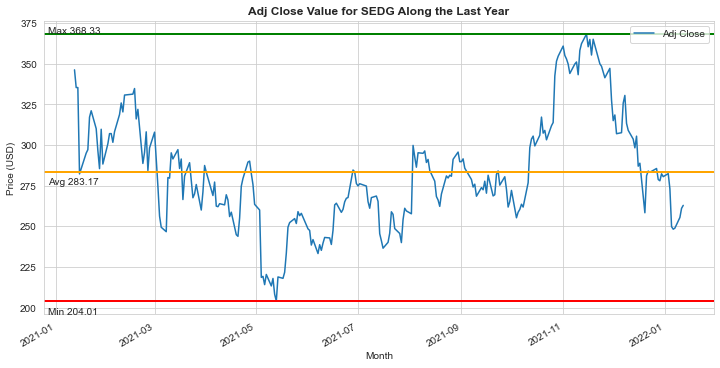

In [213]:
## Call Stock_Line_Plot Function
stock_line_plot('SEDG', 'Adj Close', SEDG, 'Price (USD)')

## Below is simpler method to call graphs without using a function
## Plot graph for showing closing price of the stock
## over the time period specified
## Change 'SymbolCode' (i.e. SEDG) to any stock in your list

### Uncomment by deleting "#" below in front of each symbol code, but place a # before
### the above function
### to compare any other stocks in your list
#SEDG['Adj Close'].plot(legend=True,figsize=(12,6),label='SEDG')
#TSLA['Adj Close'].plot(legend=True,figsize=(12,5),label='AAPL')
#ORA['Adj Close'].plot(legend=True,figsize=(12,5),label='MSFT')
#FSLRA['Adj Close'].plot(legend=True,figsize=(12,5),label='AMZN')

## Plot Labels
#plt.ylabel('Adjusted Closing Price');
#plt.title('Closing Price Graph Over Time');

__!Plug and Play Section!__

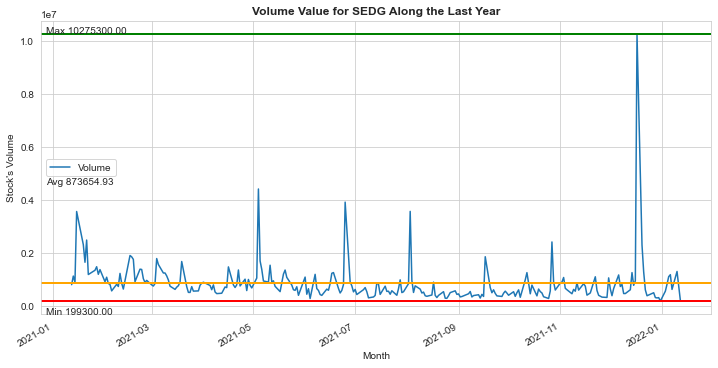

In [76]:
# Volume analysis
stock_line_plot('SEDG', 'Volume', SEDG, "Stock's Volume")

## Plot graph for showing volume of the stock
## over the time period specified
## Change 'SymbolCode' (i.e. SEDG) to any stock in your list
#SEDG['Volume'].plot(legend=True,figsize=(12,5),label='SEDG');

## Plot Labels
#plt.ylabel('Volume');
#plt.title('Volume Graph Over Time');

__Data Analysis for second Chosen Stock__
<br>
__!Plug and Play Section!__

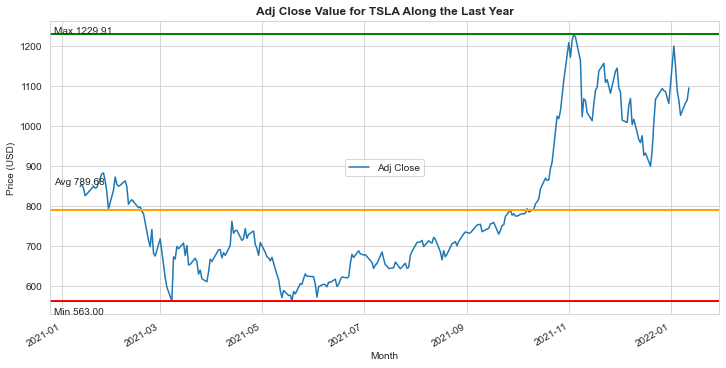

In [78]:
## Change 'SymbolCode' (i.e. TSLA to any stock in your list
stock_line_plot('TSLA', 'Adj Close', TSLA, 'Price (USD)');

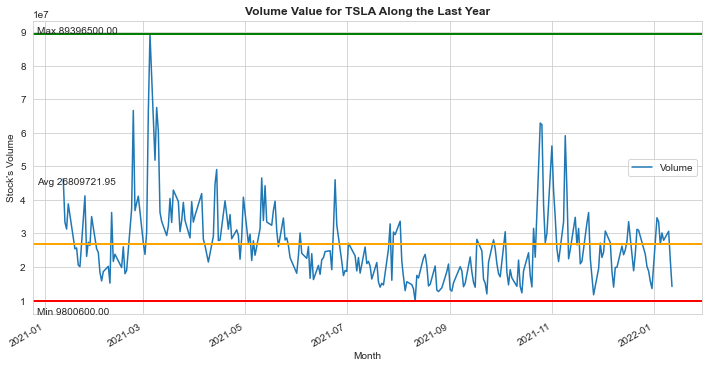

In [81]:
## Change 'SymbolCode' (i.e. TSLA) to any stock in your list
stock_line_plot('TSLA', 'Volume', TSLA, "Stock's Volume");

### Moving Average Analysis and Calculation

For more info on the moving average check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp
2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


__!Plug and Play Section!__

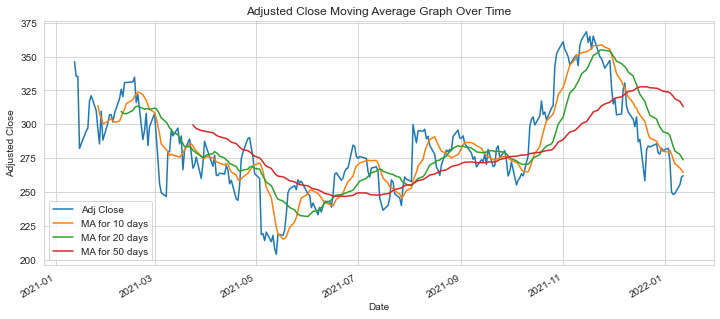

In [86]:
# Plotting number of days in moving average
# Change ALL 3 'SymbolCode' (i.e. SEDG) to any same stock in your list

# Days dataframe
ma_day = [10,20,50]

# For loop for ma_day
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    SEDG[column_name] = DataFrame.rolling(SEDG['Adj Close'],ma).mean()
    
# Pass list of column names
SEDG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5));

# Plot Labels
plt.ylabel('Adjusted Close');
plt.title('Adjusted Close Moving Average Graph Over Time');

In [87]:
# Alternate Function to calculate moving averages
def moving_averages(data, indicator, ma_days):
    for ma in ma_days:
        column_name = "MA for %s days" % (str(ma))
        data[column_name] = data[indicator].rolling(window = ma, center = False).mean()

__!Plug and Play Section!__

In [94]:
# Define the moving averages to work with
# Change ALL 2 'SymbolCodes' (i.e. SEDG and TSLA) to any stocks in your list
ma_day = [10, 20, 50]

# Now we will add a new column to each dataframe with the MA information
## Moving averages for SEDG
moving_averages(SEDG, 'Adj Close', ma_day)
## ## Moving averages for TSLA
moving_averages(TSLA, 'Adj Close', ma_day)

In [90]:
# Function to plot Moving Averages
def plot_averages(data, ma_days, indicator, stock):
    # Define a list for the MA windows
    ma_windows = ['MA for %s days' % str(ma) for ma in ma_days]
    ma_windows.append(indicator)
    data[ma_windows[0:len(ma_windows)]].plot(figsize = (10, 4), subplots = False)
    plt.title("Moving Averages for %s" % stock)
    plt.ylabel("Price (USD)")

__!Plug and Play Section!__

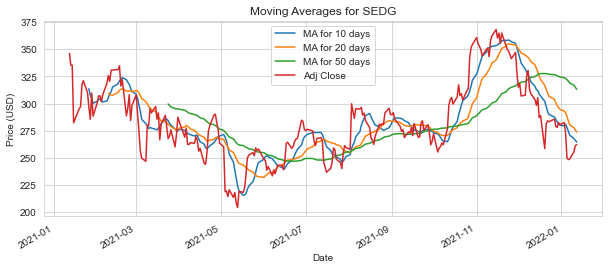

In [95]:
# Plot of moving averages for SEDG
# Change 'SymbolCodes' (i.e. SEDG) to a stock you chose above
plot_averages(SEDG, ma_day, 'Adj Close', 'SEDG')

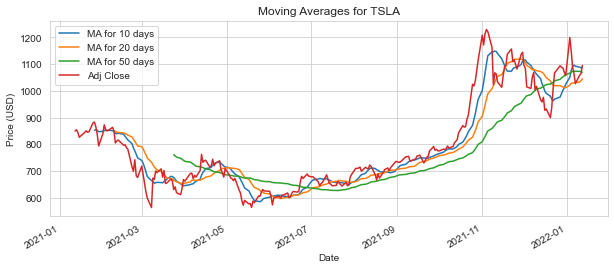

In [96]:
# Plot of moving averages for SEDG
# Change 'SymbolCodes' (i.e. SEDG) to a stock you chose above
plot_averages(TSLA, ma_day, 'Adj Close', 'TSLA')

### Daily Return Analysis Section

This section's primary purpose is to analyze risk by looking at daily changes of a stock. Ideally we are looking for a "Return on Investment" which stock brokers or non-stock professionals should be looking for. This is calculated by dividing loss or gain on the investment from one day by the original cost of the investment (day 1 market value).

Source: __[Calculate Daily Return](http://www.ehow.com/how_6453081_calculate-daily-return.html)__

__!Plug and Play Section!__

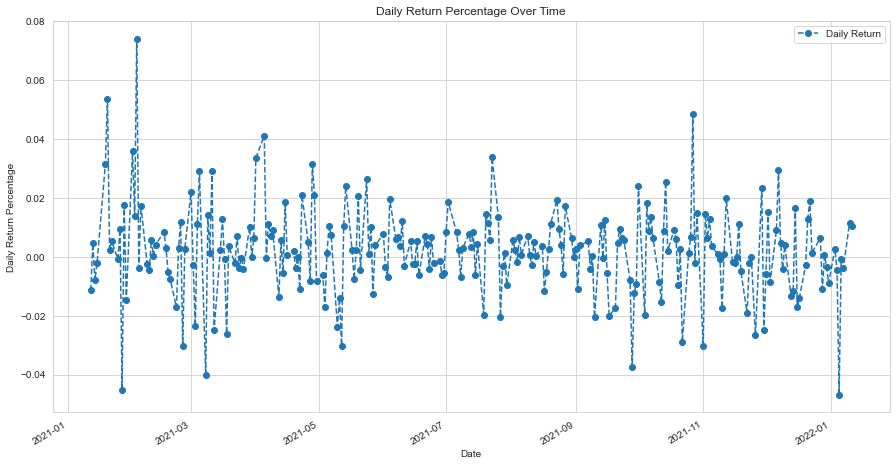

In [41]:
# Change ALL 3 'SymbolCode' (i.e. GOOG) to any same stock in your list

# Find percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

# Plotting the daily return percentage over time
GOOG['Daily Return'].plot(figsize=(15,8),legend=True,linestyle='--',marker='o')

# Plot Labels
plt.ylabel('Daily Return Percentage');
plt.title('Daily Return Percentage Over Time');

In [99]:
# Alternate Function to calculate the daily return
# Adapted from https://nbviewer.org/github/jarturomora/python-data-analysis/blob/master/Mexican%20Stocks%20Data%20Analysis.ipynb
def daily_return(data, indicator):
    data['Daily Return'] = data[indicator].pct_change()

__!Plug and Play Section!__

In [104]:
# Calculate daily return for SEDG
# Replace both 'SymbolCodes' with your chosen stocks
daily_return(SEDG, 'Adj Close')

# Calculate daily return for TSLA
daily_return(TSLA, 'Adj Close')

In [101]:
# Function to ploy daily return
def plot_daily_return(data, indicator, stock):
    data[indicator].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')
    plt.title("Daily Return for %s" % stock)
    plt.ylabel("Daily Return (%)")

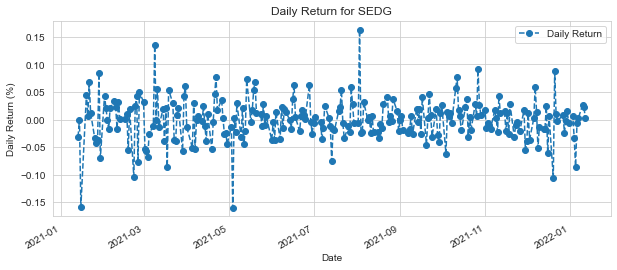

In [102]:
# Plot daily return for BACHOCOB.MX
plot_daily_return(SEDG, 'Daily Return', 'SEDG')

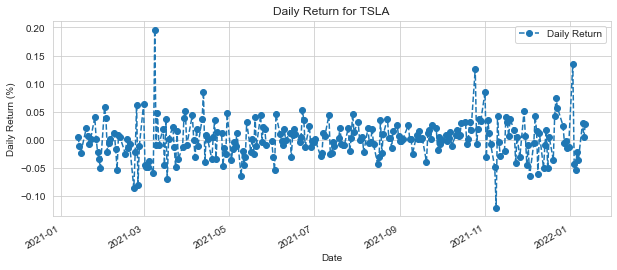

In [103]:
# Plot daily return for TSLA
plot_daily_return(TSLA, 'Daily Return', 'TSLA')

The below graphs show the average daily return as histograms

In [113]:
# Function to create the histogram
def daily_return_histogram(data, indicator, stock):
    sns.displot(data[indicator].dropna(), bins = 100, color = 'blue', kde=True)
    plt.title("Histogram of %s Daily Return" % stock)
    plt.ylabel("Counts")

__!Plug and Play Section!__

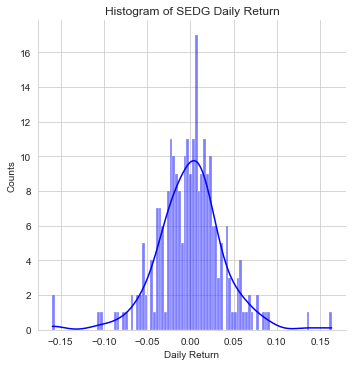

In [114]:
# Change 'SymbolCode' (i.e. SEDG) to stock you have been analyzing
# Histogram for SEDG
daily_return_histogram(SEDG, 'Daily Return', 'SEDG')

## Plotting the Average Daily Return using a Distribution Plot
#sns.displot(SEDG['Daily Return'].dropna(),bins=100,color = 'purple');

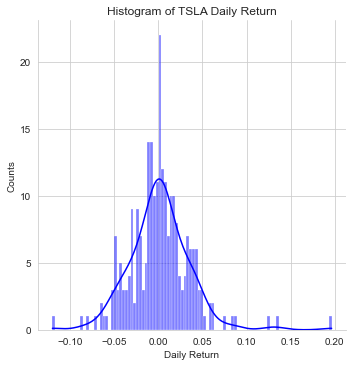

In [115]:
# Change 'SymbolCode' (i.e. SEDG) to stock you have been analyzing
# Histogram for TSLA
daily_return_histogram(TSLA, 'Daily Return', 'TSLA')

# Alternately calling .hist and instead of .displot
#SEDG['Daily Return'].hist(bins=100);

### Closing Stock Price and Return for Stocks

Now to analyze returns of all stocks in our finance dataframe, and combine into a new dataframe.

In [118]:
# Creates new Dataframe object by combining how many stocks you have in your "tech_list"
closing_df = web.DataReader(stock_list,'yahoo',start,end)['Adj Close']
# A Quick Look at the combined data
closing_df.head()

Symbols           TSLA         ORA        SEDG        FSLR
Date                                                      
2021-01-12  849.440002  109.054596  346.299988  104.320000
2021-01-13  854.409973  109.730164  335.399994  104.180000
2021-01-14  845.000000  111.886032  335.399994  106.040001
2021-01-15  826.159973  107.325935  282.260010   96.580002
2021-01-19  844.549988  106.580826  295.049988  100.239998

In [119]:
# Makes another new dataframe by combining closing price dataframe with daily percent change
stock_rets = closing_df.pct_change()
# A quick look at the combined data
stock_rets.head()

Symbols         TSLA       ORA      SEDG      FSLR
Date                                              
2021-01-12       NaN       NaN       NaN       NaN
2021-01-13  0.005851  0.006195 -0.031476 -0.001342
2021-01-14 -0.011013  0.019647  0.000000  0.017854
2021-01-15 -0.022296 -0.040757 -0.158438 -0.089212
2021-01-19  0.022260 -0.006942  0.045313  0.037896

__!Plug and Play Section!__

This section is designed to use a jointplot to compare the return of two stocks in order to see how they might correlate. Initially we compare one stock against itself, and then two to determine correlation. If two stocks are perfectly/positively correlated with each other a *linear* relationship between daily returns will show.

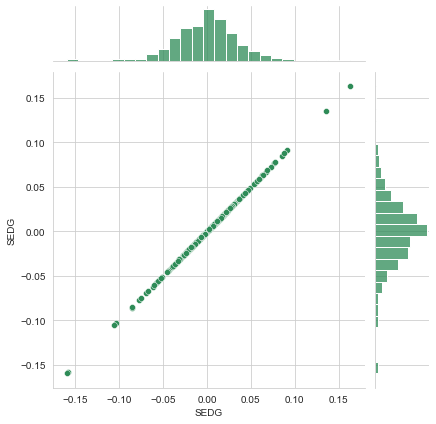

In [120]:
# Change 'SymbolCode' (i.e. SEDG on x and y to any two stocks on your list

# First compares one stock against itself.
sns.jointplot(x='SEDG',y='SEDG',data=stock_rets,kind = 'scatter', color = 'seagreen');

__!Plug and Play Section!__

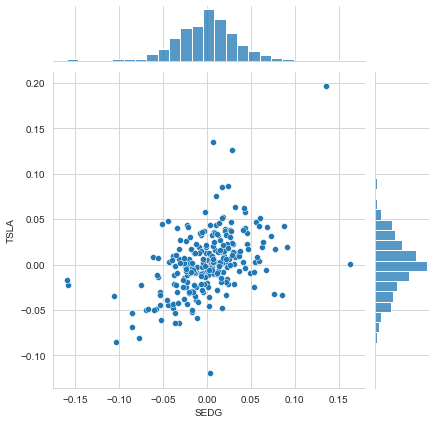

In [122]:
# Change 'SymbolCode' (i.e. SEDG and TSLA) on x and y to any two stock on your list

# Now compare two stocks
sns.jointplot(x='SEDG',y='TSLA',data=stock_rets,kind = 'scatter');

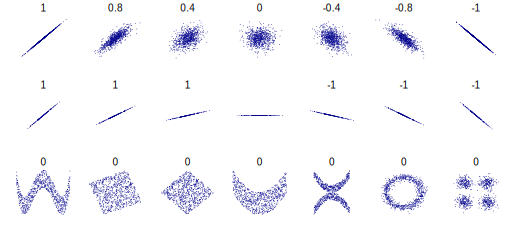

In [123]:
# Quick reference cheet sheet image to show correlation coefficient visualized
# Indicates strength of correlation and direction
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

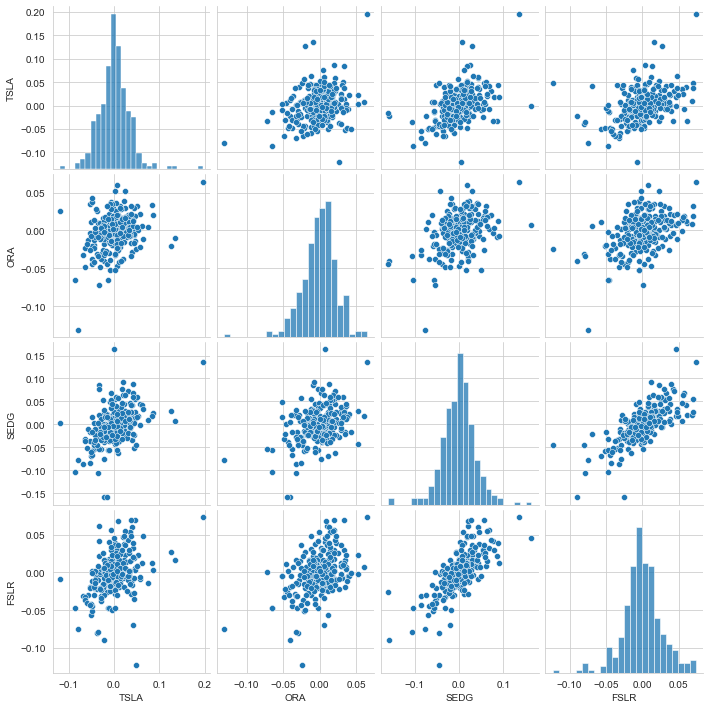

In [124]:
# Call a pairplot on combined data frame to repeat above analysis
# for every combination of stocks in list

# Pair Plots to show quick glance of any interesting correlations, if there any
# could be worth investigating that relationship
sns.pairplot(stock_rets.dropna());

In [125]:
# Quickly show again daily return percentages over last 5 days
stock_rets.head()

Symbols         TSLA       ORA      SEDG      FSLR
Date                                              
2021-01-12       NaN       NaN       NaN       NaN
2021-01-13  0.005851  0.006195 -0.031476 -0.001342
2021-01-14 -0.011013  0.019647  0.000000  0.017854
2021-01-15 -0.022296 -0.040757 -0.158438 -0.089212
2021-01-19  0.022260 -0.006942  0.045313  0.037896

Analyzing any correlation of the closing price instead using the same technique and a new dataframe for returns. Unleash the power of seaborn!

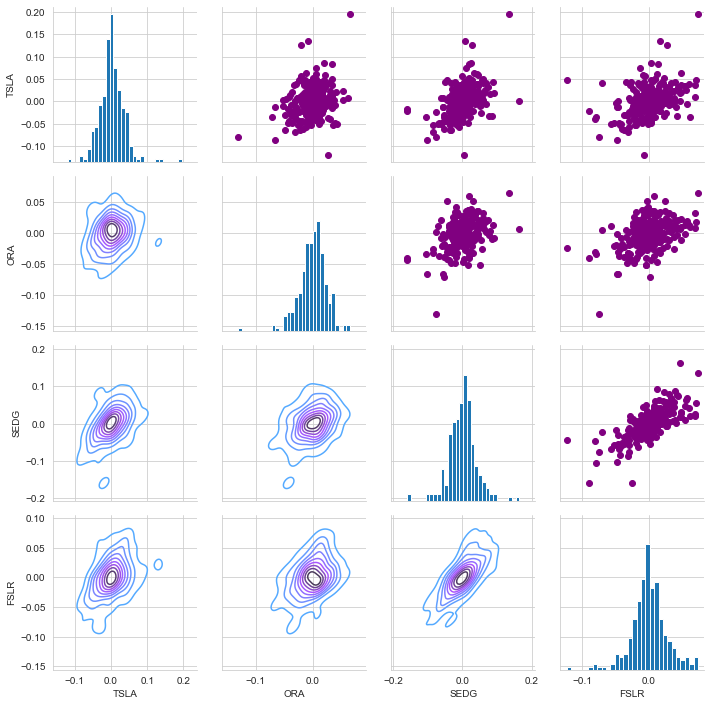

In [126]:
# Name figure as returns_fig, call PairGrid on DataFrame
returns_fig = sns.PairGrid(stock_rets.dropna())

# Use map_upper to specify what the triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# Define lower triangle in figure, type of plot, and color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define diagonal as a series of hisogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

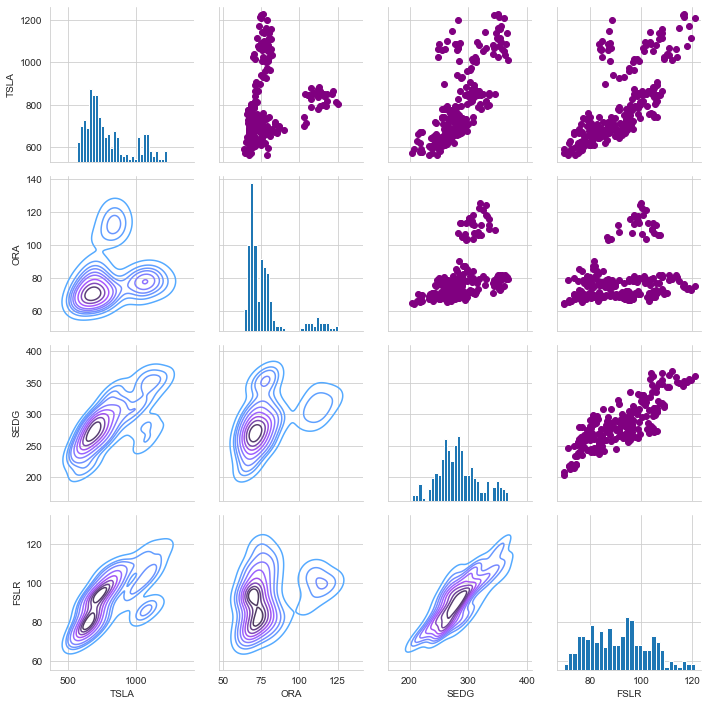

In [127]:
# Using the same technique above, except on the closing price dataframe.

# Call pairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Use map_upper to specify what the triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# Define lower triangle in figure, type of plot, and color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define diagonal as a series of hisogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30);

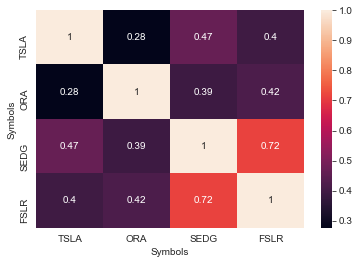

In [128]:
# Correlation plot to see actual numbers paired with a visual heatmap.

# Calls heatmap on closing price dataframe to find any correlation for daily returns percentage
# Note: Higher the percentage the better
sns.heatmap(stock_rets.dropna().corr(),annot=True);

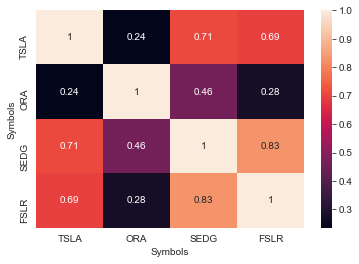

In [129]:
# Correlation plot to see actual numbers paired with a visual heatmap.

# Calls heatmap on just the closing price dataframe to find any correlation
# Note: Higher the percentage the better
sns.heatmap(closing_df.corr(),annot=True);

### Risk Analysis Section

This section is to show how risk is quantified, and the basic way to show this is by using daily percentage returns and compare expected return with a standard deviation of daily returns. Standard Deviation being the measure of variation or dispersion for the set of our values.

Low = Values tend to be closer to the mean (expected value)
<br>
High = Values are spread out over a wider range

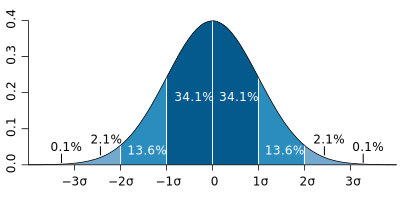

In [130]:
from IPython.display import SVG
SVG(url='https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg')

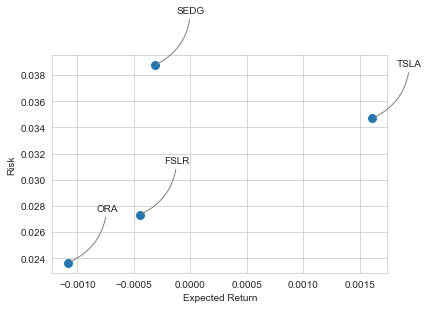

In [132]:
# New Dataframe to clean data of original tech_rets Dataframe
rets = stock_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

## Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.ylim([0.01,0.025])
#plt.xlim([-0.003,0.004])

# Plot labels for x and y axis
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color ="0.5",
                          connectionstyle = 'arc3,rad=-0.3'))

## Value at Risk (VaR) and Definitions

Value At Risk = Amount of money we could lose for a given confidence interval

### Method 1: Value at Risk "Bootstrap Method"

Calculation of Empirical quantiles from a histogram of daily returns.

In [138]:
# Function to plot the VaR for a stock
def plot_value_risk(data, symbol, indicator):
    sns.displot(data[indicator].dropna(), bins = 100, color = "blue", kde=True)
    plt.title("Value at Risk for %s" % symbol)
    risk_line = data['Adj Close'].pct_change().dropna().quantile(0.05)
    plt.axvline(x = risk_line, color = "red")
    plt.figtext(0.15, 0.8, "Max Risk %0.2f%%" % (risk_line*100))

__!Plug and Play Section!__

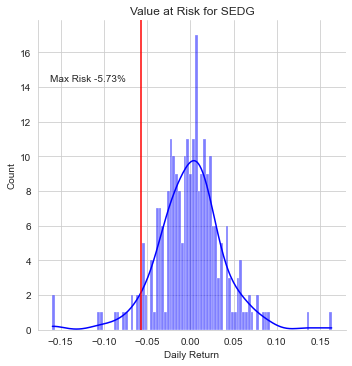

In [139]:
## Change 'SymbolCode' (i.e. SEDG) on one stock in list
# New Plotting value at risk for first stock
plot_value_risk(SEDG, 'SEDG', 'Daily Return')

## Repeat calling of earlier histogram, but using dropna for NaN values
## Old
#sns.displot(SEDG['Daily Return'].dropna(),bins=100,color='purple');

In [140]:
# Quick look at rets
rets.head()

Symbols         TSLA       ORA      SEDG      FSLR
Date                                              
2021-01-13  0.005851  0.006195 -0.031476 -0.001342
2021-01-14 -0.011013  0.019647  0.000000  0.017854
2021-01-15 -0.022296 -0.040757 -0.158438 -0.089212
2021-01-19  0.022260 -0.006942  0.045313  0.037896
2021-01-20  0.006986 -0.027405  0.007219  0.015064

__!Plug and Play Section!__

In [141]:
# Change 'SymbolCode' (i.e. SEDG) for one stock of your choice in tech_list

# Using 0.05 empirical quantile of daily returns
rets['SEDG'].quantile(0.05)

-0.0573114636727839

Depending on value you get will determine the "worst" possible daily loss exceeding a specific amount with __95% confidence__. This example uses SolarEdge Technologies, Inc. stocks, and at the time this was ran again on 1/12/2022, the 0.05 empirical quantile of daily returns is __-0.057__. This means the worst daily loss will not exceed 5.7%.  If you have a 1,000 dollar investment, the one day 5% VaR is 0.057*1000 = $57.
<br>
<br>
The Math: EQ x Investment = Worst Daily Loss
<br>
<br>

In [143]:
#Automatic calculation, replace SEDG and 1000 with total investment
rets['SEDG'].quantile(0.05)*1000

-57.3114636727839

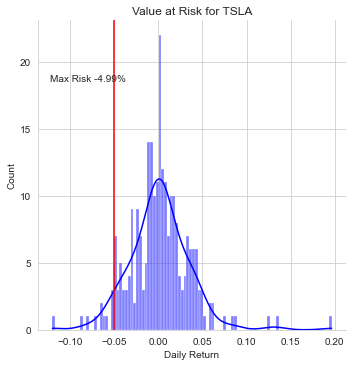

In [144]:
plot_value_risk(TSLA, 'TSLA', 'Daily Return')

In [145]:
rets['TSLA'].quantile(0.05)*1000

-49.92496596909788

### Method 2: Value at Risk "Monte Carlo Method"

__Risk Analysis Definitions__

_"Monte Carlo Method"_ = Uses geometric brownian motion, the stock price follows a random walk and is consistent with a weak form of the efficient market hypothesis (past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.
<br>
<br>
This means past info on the price of a stock is independent of where the stock price will be in the future (its not a perfect prediction).
<br>
<br>
$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
<br>
<br>
S = Stock Price
<br>
mu = Expected Return
<br>
sigma = Standard Deviation
<br>
t = Time
<br>
episolon = Random Variable
<br>
<br>

Multiply both sides by the stock price to rearrange formula and solve for the stock price:
<br>
<br>
$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 
<br>
<br>
First term is known as "drift" (average daily return X change of time).
<br>
<br>
Second term is known as "shock" (for each time period of stock will drift, then experience shock will randomly push the stock price up or down, simulating series of drifts and shock thousands of times to create a simulation)

__!Plug and Play Section!__

In [146]:
# Change 'SymbolCode' (i.e. SEDG) for one stock of your choice in stock_list

#Using Monte Carlo Method on your chosen stock.
# Time Horizon (1 Year)
days = 365

# Delta of Time Horizon
dt = 1/days

# Drift from expected return data
mu = rets.mean()['SEDG']

# Volatility of the stock from STD of average return
sigma = rets.std()['SEDG']

In [147]:
# Monte Carlo Function
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # For Loop Price Array for Number of Days
    for x in range(1,days):
        
        # Shock Calculated
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        # Drift Calculated
        drift[x] = mu * dt
        
        # Price Calculated
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [148]:
# Quick look at one stock again to find the current High Price of the Day
# The Other stocks should look the same at this point, if you wish to look
SEDG.head()

High         Low        Open       Close   Volume  \
Date                                                                  
2021-01-12  361.500000  343.149994  360.329987  346.299988   818600   
2021-01-13  351.049988  331.029999  348.299988  335.399994  1143500   
2021-01-14  350.989990  334.519989  340.000000  335.399994   916900   
2021-01-15  330.929993  281.829987  329.559998  282.260010  3579400   
2021-01-19  301.000000  291.119995  296.690002  295.049988  2329300   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                     
2021-01-12  346.299988             NaN             NaN             NaN   
2021-01-13  335.399994             NaN             NaN             NaN   
2021-01-14  335.399994             NaN             NaN             NaN   
2021-01-15  282.260010             NaN             NaN             NaN   
2021-01-19  295.049988             NaN             NaN             NaN   

            Daily Return  
Date                      
2021-01-12           NaN  
2021-01-13     -0.031476  
2021-01-14      0.000000  
2021-01-15     -0.158438  
2021-01-19      0.045313

In [198]:
FSLR.head()

High         Low        Open       Close   Volume  \
Date                                                                  
2021-01-12  107.470001  101.930000  104.470001  104.320000  2667900   
2021-01-13  105.309998  101.349998  104.580002  104.180000  1776600   
2021-01-14  108.470001  104.599998  104.599998  106.040001  2429500   
2021-01-15  105.290001   96.290001  104.989998   96.580002  4178100   
2021-01-19  100.989998   98.470001   99.769997  100.239998  2561400   

             Adj Close  
Date                    
2021-01-12  104.320000  
2021-01-13  104.180000  
2021-01-14  106.040001  
2021-01-15   96.580002  
2021-01-19  100.239998

__!Plug and Play Section!__

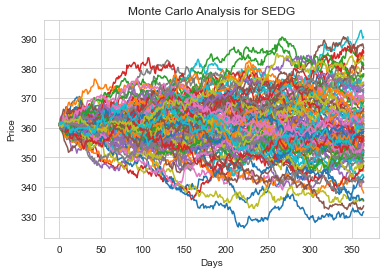

In [149]:
# Adjust start_price based on finding for current day high price.
# Adjust title name for chosen stock (i.e. SEDG)

# Start price from .head in line 185

start_price = 361.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

# Label the Plot
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for SEDG');

In [150]:
# Simulation for number of runs

# Set a large number here
runs = 10000

# Empty Matrix to hold the end price data
simulations = np.zeros(runs)

# Set print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

# For loop setting simulation data point as the last stock price for that run
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

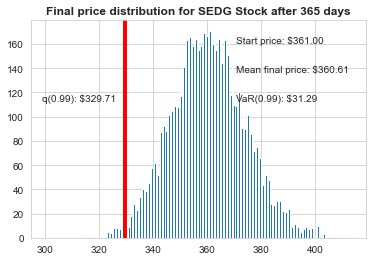

<Figure size 1440x720 with 0 Axes>

In [152]:
# Plot a histogram after the array of simulations runs and uses a quantile to define risk
# for chosen stock

# Define Q as 1% Quantile, meaning 99% of values fall in this Quantile
q = np.percentile(simulations,1)

# Plot Distribution of End Prices
plt.hist(simulations,bins=200)

# Starting price
plt.figtext(0.6,0.8, s ="Start price: $%.2f" %start_price)
# Mean Ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price within 99% confidence interval
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(start_price - q,))

# Display 1% quantile
plt.axvline(x=q,linewidth=4,color='r')

# Display a line at the 1% quantile result
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Title and Size Format
plt.title(u"Final price distribution for SEDG Stock after %s days" %days, weight='bold');
plt.figure(figsize=(20,10));

The result should show a 1% empirical quantile of final price distribution that estimates __Value at Risk__ for chosen stock, which in the current example is at $31.29 for every investment of the start price.
<br>
<br>
In this example, for every SEDG stock purchase at the current date, one would put __31.29 at risk 99% of the time__.

In [192]:
# Alternate Function to implement Monte Carlo and easily call different stocks
def stock_monte_carlo(start_price, days, mu, sigma):
    """This function simulates a prices array using the Monte Carlo Method"""
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift for Monte Carlo
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        # Calculate shock
        # NOTE: We use random normal due to the stock distribution
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))        
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate simulated price
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] +  shock[x]))
    return price

# Alternate Function to iterate Monte Carlo for simulation
def monte_carlo_simulation(iterations, symbol, start_price, days, mu, sigma):
    for run in range(iterations):
        plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Monte Carlo Analysis for %s" % symbol, weight = "bold")
    
# Alternate Function to plot an histogram from the Monte Carlo simutation with the final price distribution
def final_price_distribution(iterations, symbol, start_price, days, mu, sigma):    
       
    # Plot the Monte Carlo Simulation
    monte_carlo_simulation(iterations, symbol, start_price, days, mu, sigma)
    
    # Create an empty matrix to hold the end price data
    simulations = np.zeros(iterations)
    
    # Set the print options of numpy to only display 0-5 points from an array to suppress output
    np.set_printoptions(threshold = 5)
    
    # Run the Monte Carlo simulation and take only the end price data to create an histogram for risk analysis
    for run in range(iterations):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]
    
    # Now we'll define "q" as the 1% emprical quantile, this means that 99% of the value should fall between here
    q = np.percentile(simulations, 1)
    
    # Now we plot the histogram for the distribution of the end prices
    plt.figure()
    plt.hist(simulations, bins = 100)
    
    # Next we add some extra information to the histogram
    
    # Starting price
    plt.figtext(0.6, 0.8, "Start Price: $%0.2f" % start_price)
    # Mean ending price
    plt.figtext(0.6, 0.7, "Mean Final Price: $%0.2f" % simulations.mean())
    # Variance of the price (Value at risk within 99% confidence interval)
    plt.figtext(0.6, 0.6, "VaR(0.99): $%0.2f" % (start_price - q))
    # Display 1% quantile
    plt.figtext(0.15, 0.6, "q(0.99): $%0.2f" % q)
    # Plot a line at the 1% quantile
    plt.axvline(x = q, linewidth = 4, color = "red")
    # Title
    plt.title(u"Final Price Distribution for %s Stock after %s Days" % (symbol, days), weight = "bold")

In [199]:
# Analysis for an additional stock

## Setting-up variables
days = 365 # Time horizon
dt = 1/days # Delta
mu = rets.mean()['FSLR'] # The average for the expected return
sigma = rets.std()['FSLR'] # The standard deviation for the expected return
start_price = symbols['FSLR']['Open'][0] # The first open price in our dataset

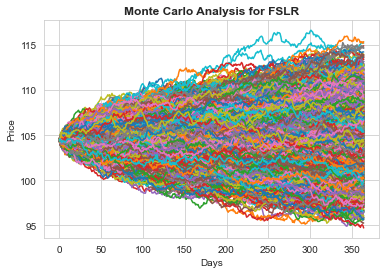

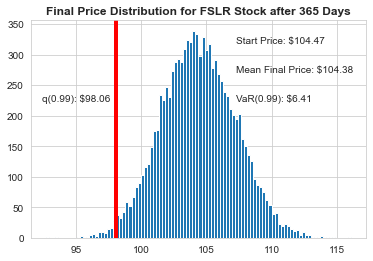

In [200]:
# Running the Monte Carlo simulation with 10000 iterations
final_price_distribution(10000, 'FSLR', start_price, days, mu, sigma)

In this example for FSLR stocks one be putting __about $6.41 at risk 99% of time__.

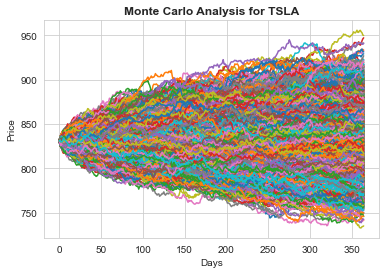

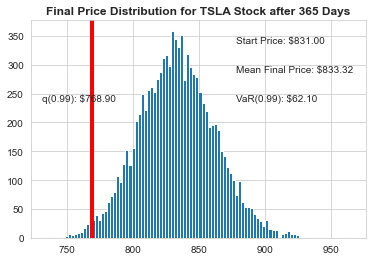

In [201]:
# Analysis for an additional stock

## Setting-up variables
days = 365 # Time horizon
dt = 1/days # Delta
mu = rets.mean()['TSLA'] # The average for the expected return
sigma = rets.std()['TSLA'] # The standard deviation for the expected return
start_price = symbols['TSLA']['Open'][0] # The first open price in our dataset

# Running the Monte Carlo simulation with 10000 iterations
final_price_distribution(10000, 'TSLA', start_price, days, mu, sigma)

In this example for TSLA stocks one be putting about __$62.10 at risk 99% of time__.

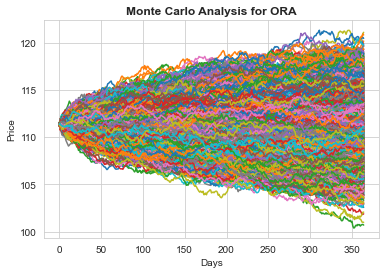

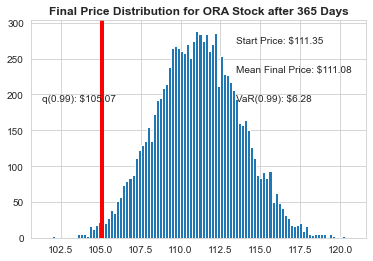

In [202]:
# Analysis for an additional stock

## Setting-up variables
days = 365 # Time horizon
dt = 1/days # Delta
mu = rets.mean()['ORA'] # The average for the expected return
sigma = rets.std()['ORA'] # The standard deviation for the expected return
start_price = symbols['ORA']['Open'][0] # The first open price in our dataset

# Running the Monte Carlo simulation with 10000 iterations
final_price_distribution(10000, 'ORA', start_price, days, mu, sigma)

In this example for FSLR stocks one be putting about __$6.28 at risk 99% of time__.

## Conclusion

From this analysis of TSLA, ORA, SEDG, and FSLR ; Tesla _appears_ to be a risky choice, but that can be deceiving due to a higher starting price, the price of its stocks have been rising throughout the year compared to ORA, SEDG, and FSLR which while not all bad have ups and downs. ORA specifically is a relatively safe option with a low starting price and least risk.
<br>
<br>
It is best to do additional research on your own to see what the market is saying, but if you have been reading up on the stock market, you may just have a 'feeling' about one particular company over another based any number of other factors (regulations can play into affect, especially for car companies). It is also easier than ever to invest in the stock market for the average person.
<br>
<br>
Based on these findings alone we could conclude __that TSLA is safe choice into the future__ whereas __FSLR and SEDG could also be cheaper options to bet on into the future__ and __ORA appears to be the least risky investment__.  It is also important to factor in how these companies have performed over longer periods (for example, longer than a year). This project can be adapted to change the start time for further years if needed.